# Lab 2 - Random Graphs: The Erdős–Rényi Model (Solutions)

#### Authors:

*This lab has been iteratively developed for EE 126 at UC Berkeley by Rishi Sharma, Sahaana Suri, Kangwook Lee, Kabir Chandrasekher, Max Kanwal, Tony Duan, David Marn, Ashvin Nair, Tavor Baharav, Sinho Chewi, Andrew Liu, Kamil Nar, David Wang, and Kannan Ramchandran.*

## Question 1 -- The Erdős–Rényi Model

To begin the lab, we explore random graphs, introduced by [Erdős and Rényi](http://www.renyi.hu/~p_erdos/1959-11.pdf).  -- $G(n,p)$ has $n$ nodes and probability $p$ of an edge between each node.

You will need to install [NetworkX](http://networkx.github.io/documentation/latest/install.html) in order to complete this lab. If you have difficulty installing it, you can follow a StackOverflow thread available [here](http://stackoverflow.com/questions/9836909/easy-install-networkx). Many of you may already have NetworkX because it comes default with the Anaconda installation of iPython.

We provide the following basic imports as well as a function written to draw graphs for you. The structure of a graph object is a collection of edges, in (node1, node2) form. You should know how to use `draw_graph`, but you don't really need to know how it works. Play around with it and look at those pretty graphs :)

In [2]:
%matplotlib inline
from pylab import *
import random as rnd
import networkx as nx
from __future__ import division

rcParams['figure.figsize'] = 12, 12  # that's default image size for this interactive session

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    """ 
    Based on: https://www.udacity.com/wiki/creating-network-graphs-with-python
    We describe a graph as a list enumerating all edges.
    Ex: graph = [(1,2), (2,3)] represents a graph with 2 edges - (node1 - node2) and (node2 - node3)
    """
    
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    # show graph
    plt.show()

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


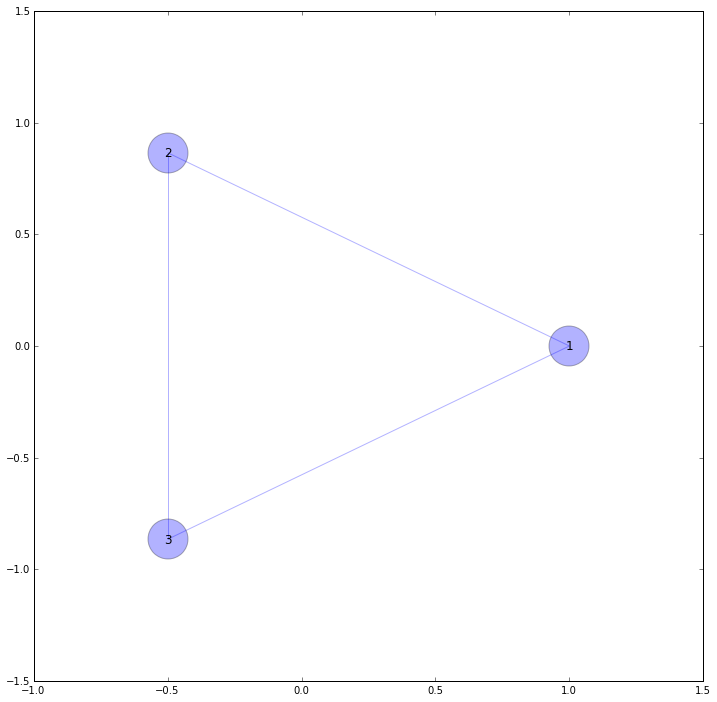

In [3]:
graph = [(1,2),(2,3),(1,3)]
draw_graph(graph)

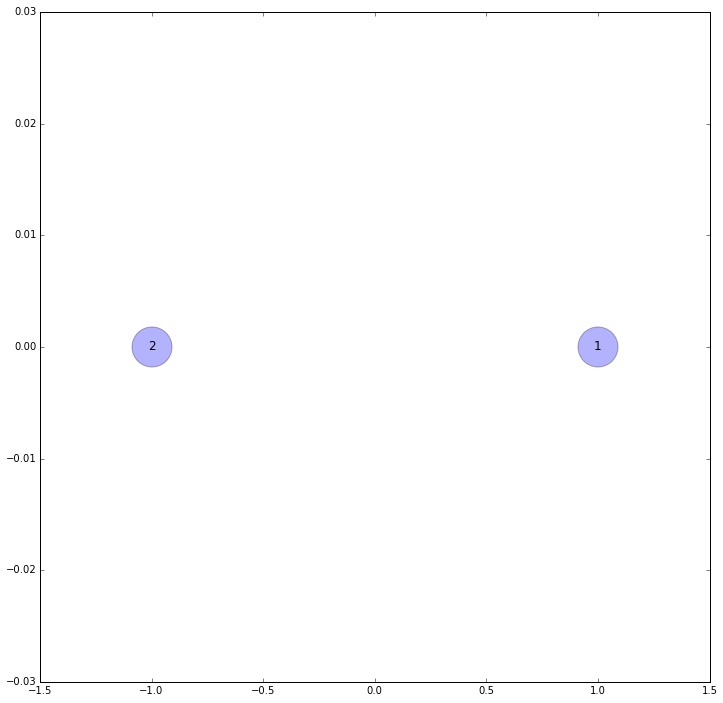

In [4]:
graph = [(1,1),(2,2)]
draw_graph(graph) # no self-loops, so put a self-loop if you want a disconnected node

Lets create a function that returns all the nodes that can be reached from a certain starting point given the representation of a graph above.

### 1a. Fill out the following method to find the set of connected components from a starting node on a graph.

In [5]:
def find_connected_component(graph, starting_node):
    """
    >>> graph = [(1,2),(2,3),(1,3)]
    >>> find_connected_component(graph,1)
    {1, 2, 3}
    >>> graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
    >>> find_connected_component(graph,1)
    {1, 7, 8}
    >>> find_connected_component(graph,2)
    {2, 3, 4, 5, 6}
    """
    connected_nodes = set()
    connected_nodes.add( starting_node )
    
    #Your code here
    
    return connected_nodes

**Solution**

In [6]:
def find_connected_component(graph, starting_node):
    connected_nodes = set()
    connected_nodes.add( starting_node )
    changed_flag = True
    while changed_flag:
        changed_flag = False
        for node1,node2 in graph:
            if (node1 in connected_nodes and node2 not in connected_nodes) or \
                (node1 not in connected_nodes and node2 in connected_nodes):
                connected_nodes.add(node1)
                connected_nodes.add(node2)
                changed_flag = True
    return connected_nodes

In [7]:
graph = [(1,2),(2,3),(1,3)]
find_connected_component(graph,1)

{1, 2, 3}

In [8]:
graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
# draw_graph(graph)
find_connected_component(graph,1)

{1, 7, 8}

In [9]:
find_connected_component(graph,2)

{2, 3, 4, 5, 6}

### 1b. Fill out the following method that takes and returns all the connected components of the graph.

You may want to use the function you wrote above.

In [10]:
def connected_components(graph):
    """
    >>> graph = [(1,1),(2,3),(2,4),(3,5),(3,6),(4,6),(1,7),(7,8),(1,8)]
    >>> connected_components(graph)
    [{1, 7, 8}, {2, 3, 4, 5, 6}]
    >>> largest_component_size(graph)
    5
    """
    nodes = set()
    components = []

    # Your code here
    
    return components

**Solution**

In [11]:
def connected_components(graph):
    nodes = set()
    components = []
    for edge in graph:
        for node in edge:
            nodes.add(node)
    flag = False
    for node in nodes:
        for component in components:
            if node in component:
                flag = True
                break
        if not flag:
            components.append(find_connected_component(graph,node))
        flag = False
    return components

component_sizes = lambda graph: [len(component) for component in (connected_components(graph))]
largest_component_size = lambda graph: max(component_sizes(graph))

In [12]:
# These guys should work after you've implemented connected_components
component_sizes = lambda graph: [len(component) for component in (connected_components(graph))]
largest_component_size = lambda graph: max(component_sizes(graph))

In [13]:
print(connected_components(graph))
print(largest_component_size(graph))

[set([8, 1, 7]), set([2, 3, 4, 5, 6])]
5


Next, we want to create a function that, given the number of nodes in a graph, will randomly generate edges between nodes. That is, we want to construct a random graph following the Erdős–Rényi model.

### 1c. Fill out the following function to create an Erdős–Rényi random graph $G(n,p)$.

In [14]:
def G(n,p):
    graph = [] 
    # Recall that we describe a graph as a list enumerating all edges. Node names can be numbers.
    
    #Your code here
    
    return graph

**Solution**

In [15]:
def G(n,p):
    graph = []
    for i in xrange(n):
        graph.append((i,i))
    for i in xrange(n):
        for j in xrange(i+1,n):
            if rnd.random() < p:
                graph.append( (i, j) )
    return graph

Make sure you can see all nodes from 1 to 10 in the graph below -- if not, check your code!

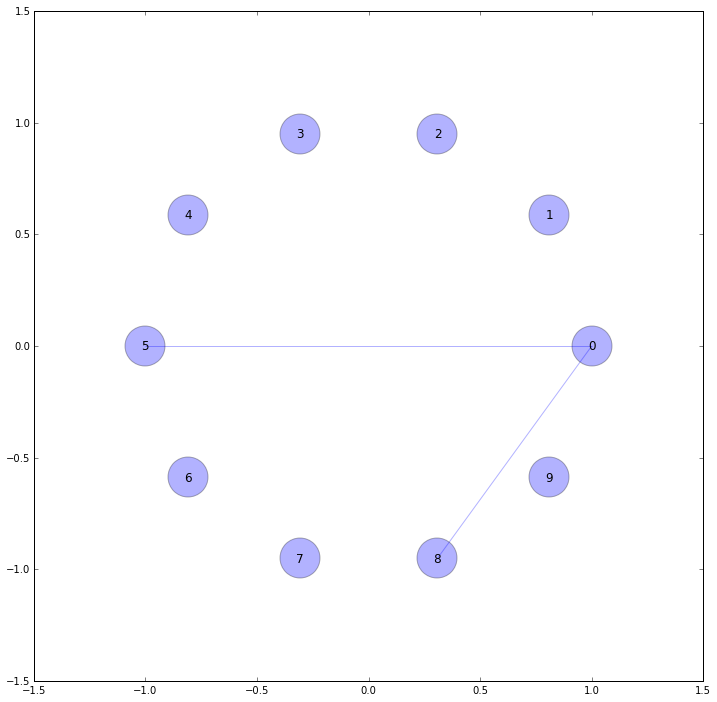

In [16]:
graph = G(10,0.1)
draw_graph(graph)

## Question 2 -- Phase Transitions!

Now let's examine some of the qualitative properties of a random graph developed in the original Erdős & Rényi paper.

Epsilon controls how arbitrarily close the random graphs get to the asymptotic limit. Smaller values of $\epsilon$ lead to tighter bounds.

(You don't need to code anything for this question).

In [17]:
epsilon = 1/100

#### Transition 1: If $np < 1$, then a graph in $\operatorname{G}(n, p)$ will almost surely have no connected components of size larger than $\operatorname{O}(\log(n))$

In [18]:
largest_sizes = []
n = 50
p = 1/50 - epsilon
for i in xrange(1000):
    graph = G(n,p)
    largest_sizes.append(largest_component_size(graph))
    
print "We expect the largest component size to be on the order of: ", np.log2(n)
print "True average size of the largest component: ", np.mean(largest_sizes)

We expect the largest component size to be on the order of:  5.64385618977
True average size of the largest component:  4.974


Let's check a visualization of the last graph we generated:

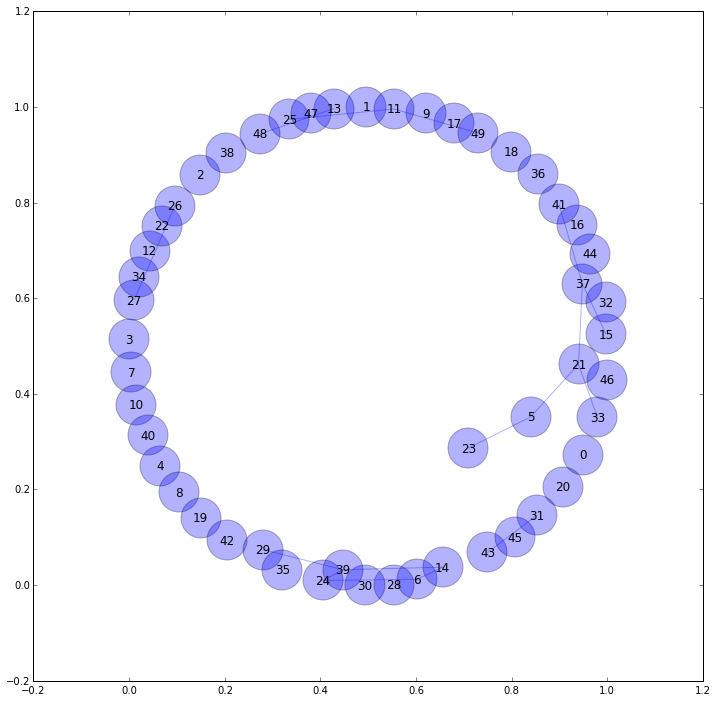

In [19]:
draw_graph(graph, graph_layout='spring')

#### Transition 2: If $np = 1$, then a graph in $\operatorname{G}(n, p)$ will almost surely have a largest component whose size is of order $n^{2/3}$.

In [20]:
largest_sizes = []
n = 50
p = 1/50
for i in xrange(1000):
    graph = G(n,p)
    largest_sizes.append(largest_component_size(graph))

print "We expect the largest componenet size to be on the order of: ", n**(2/3)
print "True average size of the largest componenent: ", np.mean(largest_sizes)

We expect the largest componenet size to be on the order of:  13.572088083
True average size of the largest componenent:  12.407


We can see this largest component visually:

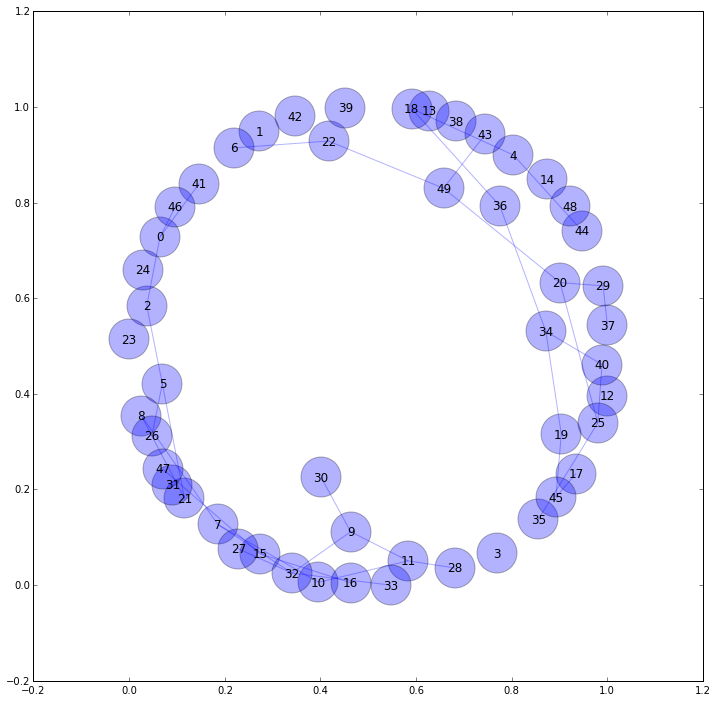

In [21]:
draw_graph(graph, graph_layout='spring')

#### Transition 3: If $np → c > 1$, where $c$ is a constant, then a graph in $\operatorname{G}(n,p)$ will almost surely have a unique giant component containing a positive fraction of the vertices. No other component will contain more than $\operatorname{O}(\log(n))$ vertices.

We'll increase the number of nodes by a factor of 10 here so we can see this more clearly. Pay attention to the precipitous decline from the size of the largest connected component to that of all the rest.

In [22]:
largest_sizes = []
epsilon = 1/5000.
n = 5000
p = 1/5000 + epsilon
graph = G(n,p)

k = 10
print "The sorted sizes of the %d largest components are:" % k
print sorted(component_sizes(graph))[::-1][:k]
print "No other component should have size more than on the order of:", np.log2(n)

The sorted sizes of the 10 largest components are:
[3971, 10, 8, 6, 6, 6, 5, 5, 5, 5]
No other component should have size more than on the order of: 12.2877123795


#### Transition 4: If $p<\tfrac{(1-\epsilon)\ln n}{n}$, then a graph in $\operatorname{G}(n,p)$ will almost surely contain isolated vertices, and thus be disconnected.

In [23]:
rnd.seed(1)
largest_sizes = []
epsilon = .1
n = 10000
p = (1-epsilon)*np.log(n) / n
num_isolated = 0
trials = 10
for _ in xrange(trials):
    graph = G(n,p)
    print 'List of component sizes:', component_sizes(graph)
    if 1 in component_sizes(graph):
        num_isolated += 1
print "Probability of graphs containing isolated vertices: ", num_isolated / trials

List of component sizes: [9998, 1, 1]
List of component sizes: [9998, 1, 1]
List of component sizes: [9998, 1, 1]
List of component sizes: [9997, 1, 1, 1]
List of component sizes: [9998, 1, 1]
List of component sizes: [9999, 1]
List of component sizes: [9998, 1, 1]
List of component sizes: [9999, 1]
List of component sizes: [9999, 1]
List of component sizes: [9997, 1, 1, 1]
Probability of graphs containing isolated vertices:  1.0


#### Transition 5: If $p>\tfrac{(1+\epsilon)\ln n}{n}$, then a graph in $\operatorname{G}(n,p)$ will almost surely be connected.

In [24]:
rnd.seed(1)
largest_sizes = []
epsilon = 1/3
n = 10000
p = (1+epsilon)*np.log(n) / n
num_isolated = 0
trials = 10
for _ in xrange(trials):
    graph = G(n,p)
    print 'List of component sizes:', component_sizes(graph)
    if 1 in component_sizes(graph):
        num_isolated += 1
print "Probability that graphs are connected: ", 1 - num_isolated / trials

List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
List of component sizes: [10000]
Probability that graphs are connected:  1.0


Cool! Now we've experimentally verified the results of the Erdős–Rényi paper. 

Isn't it neat that you can rigorously formalize this kind of qualitative behavior of a graph, and then clearly see these transitions in simulation? 